In [98]:
#Dataset: https://www.kaggle.com/kazanova/sentiment140

In [99]:
import pandas as pd

In [100]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding='latin1',header=None)

In [101]:
df = df[[5,0]]

In [102]:
df.columns = ["twitts","sentiment"]

In [103]:
df.head(2)

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0


In [104]:
df['sentiment'].value_counts()

4    807143
0    800000
Name: sentiment, dtype: int64

In [105]:
sent_mao = {0:'negative',4:'positive'}

In [106]:
df['word_counts'] = df['twitts'].apply(lambda x:len(str(x).split()))

In [107]:
import spacy

In [108]:
from spacy.lang.en.stop_words import STOP_WORDS

In [109]:
df["stop_words_len"] = df['twitts'].apply(lambda x: len([t for t in str(x).split() if t in STOP_WORDS]))

In [110]:
df.head(2)

,twitts,sentiment,word_counts,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,4
1,is upset that he can't update his Facebook by ...,0,21,9


In [111]:
df['char_counts'] = df['twitts'].apply(lambda x:len(x))

In [112]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len =word_len+ len(word)

    return word_len/len(words)

In [113]:
df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x))

In [114]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([(t for t in str(x).split() if t.startswith('#'))]))
df['mentions_count'] = df['twitts'].apply(lambda x: len([(t for t in str(x).split() if t.startswith('@'))]))

In [115]:
df.head()

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,4,115,5.052632,1,1
1,is upset that he can't update his Facebook by ...,0,21,9,111,4.285714,1,1
2,@Kenichan I dived many times for the ball. Man...,0,18,7,89,3.944444,1,1
3,my whole body feels itchy and like its on fire,0,10,5,47,3.700000,1,1
4,"@nationwideclass no, it's not behaving at all....",0,21,10,111,4.285714,1,1


In [116]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in str(x).split() if t.isdigit()]))

In [117]:
df.head()

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,4,115,5.052632,1,1,0
1,is upset that he can't update his Facebook by ...,0,21,9,111,4.285714,1,1,0
2,@Kenichan I dived many times for the ball. Man...,0,18,7,89,3.944444,1,1,0
3,my whole body feels itchy and like its on fire,0,10,5,47,3.700000,1,1,0
4,"@nationwideclass no, it's not behaving at all....",0,21,10,111,4.285714,1,1,0


In [118]:
df['upper_counts'] = df['twitts'].apply(lambda x:len([t for t in str(x).split() if t.isupper() and len(x)>3]) )

In [119]:
df.head()

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,4,115,5.052632,1,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,9,111,4.285714,1,1,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,7,89,3.944444,1,1,0,1
3,my whole body feels itchy and like its on fire,0,10,5,47,3.700000,1,1,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,10,111,4.285714,1,1,0,1


In [120]:
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

In [121]:
df.dtypes

twitts             object
sentiment           int64
word_counts         int64
stop_words_len      int64
char_counts         int64
avg_word_len      float64
hashtags_count      int64
mentions_count      int64
numerics_count      int64
upper_counts        int64
dtype: object

In [122]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [123]:
df.head(2)

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,4,115,5.052632,1,1,0,1
1,is upset that he can't update his facebook by ...,0,21,9,111,4.285714,1,1,0,0


In [124]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [125]:
def con_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x = x.replace(key,value)
      return x
    else:
      return x        

In [126]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: con_to_exp(x))

CPU times: user 1.06 s, sys: 642 µs, total: 1.06 s
Wall time: 1.06 s


In [127]:
df.head(2)

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,4,115,5.052632,1,1,0,1
1,is upset that he can't update his facebook by ...,0,21,9,111,4.285714,1,1,0,0


In [128]:
import re

In [129]:
x ="hi my email me at email@email.com another@email.com"

In [130]:
re.findall(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)',x)

['email@email.com', 'another@email.com']

In [131]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)',x) )

In [132]:
df.tail()

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails
1607138,just woke up. having no school is the best fee...,4,11,4,56,4.090909,1,1,0,0,[]
1607139,thewdb.com - very cool to hear old walt interv...,4,11,1,78,6.090909,1,1,0,0,[]
1607140,are you ready for your mojo makeover? ask me f...,4,11,5,57,4.181818,1,1,0,0,[]
1607141,happy 38th birthday to my boo of alll time!!! ...,4,12,3,65,4.416667,1,1,0,0,[]
1607142,happy #charitytuesday @thenspcc @sparkscharity...,4,5,0,62,11.400000,1,1,0,0,[]


In [133]:
df['emails_count'] = df['emails'].apply(lambda x : len(x))

In [134]:
df.head()

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,4,115,5.052632,1,1,0,1,[],0
1,is upset that he can't update his facebook by ...,0,21,9,111,4.285714,1,1,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,7,89,3.944444,1,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,5,47,3.700000,1,1,0,0,[],0
4,"@nationwideclass no, it's not behaving at all....",0,21,10,111,4.285714,1,1,0,1,[],0


In [135]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,6,103,4.150000,1,1,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,1,31,9.000000,1,1,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,11,130,5.500000,1,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that's kinda sad lol add m...,0,8,0,76,8.500000,1,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,7,137,5.428571,1,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1595481,@boudoirsextoys don't forget to shoot me an em...,4,21,10,127,5.047619,1,1,0,1,[hello@tastelikekisses.com],1
1596275,"hi there , anybody got a job for me oil &amp;...",4,15,4,98,5.533333,1,1,0,0,[aadvanspijk@yahoo.co.uk],1
1597632,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,6,95,5.785714,1,1,0,1,[lbruton@tulsalanparty.com],1
1598818,@miss_ellen good morning!!!! congrats! se...,4,9,2,77,7.111111,1,1,0,0,[jill@q985fm.com],1


In [136]:
df['twitts'] =df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)','',x))

In [137]:
df.head()

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,4,115,5.052632,1,1,0,1,[],0
1,is upset that he can't update his facebook by ...,0,21,9,111,4.285714,1,1,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,7,89,3.944444,1,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,5,47,3.700000,1,1,0,0,[],0
4,"@nationwideclass no, it's not behaving at all....",0,21,10,111,4.285714,1,1,0,1,[],0


In [138]:
df.loc[4054]['twitts']

'i want a new laptop.  hp tx2000 is the bomb. :| who knows how much it is? im me: '

In [139]:
#Count URLs and remove it

In [140]:
x = "hi, to watch more visit https://youtube.com/kgptalkie"

In [141]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)

[('https', 'youtube.com', '/kgptalkie')]

In [142]:
df['urls_flag'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)) )

In [143]:
df.head()

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,4,115,5.052632,1,1,0,1,[],0,1
1,is upset that he can't update his facebook by ...,0,21,9,111,4.285714,1,1,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,7,89,3.944444,1,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,5,47,3.700000,1,1,0,0,[],0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,10,111,4.285714,1,1,0,1,[],0,0


In [144]:
df['twitts'] =df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x))

In [145]:
df.head()

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that's a bummer. you sho...",0,19,4,115,5.052632,1,1,0,1,[],0,1
1,is upset that he can't update his facebook by ...,0,21,9,111,4.285714,1,1,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,7,89,3.944444,1,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,5,47,3.700000,1,1,0,0,[],0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,10,111,4.285714,1,1,0,1,[],0,0


In [146]:
df.loc[0]['twitts']

"@switchfoot  - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"

In [147]:
### Remove RT ###

In [148]:
df['twitts']=df['twitts'].apply(lambda x: re.sub('RT',"",x))

In [149]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9]+','',x))

In [150]:
df.head()

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww thats a bummer you shoulda ...,0,19,4,115,5.052632,1,1,0,1,[],0,1
1,is upset that he cant update his facebook by t...,0,21,9,111,4.285714,1,1,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,7,89,3.944444,1,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,5,47,3.700000,1,1,0,0,[],0,0
4,nationwideclass no its not behaving at all im ...,0,21,10,111,4.285714,1,1,0,1,[],0,0


In [151]:
### Remove multiple spaces ###


In [152]:
x ="thanks    for  watching and   please  like this vedio"

In [153]:
" ".join(x.split())

'thanks for watching and please like this vedio'

In [154]:
df['twitts']=df['twitts'].apply(lambda x: " ".join(x.split()))

In [155]:
### Remove HTML Tags###

In [156]:
from bs4 import BeautifulSoup

In [157]:
x = '<html><h2>Thanks for watching</h2></html>'

In [158]:
BeautifulSoup(x,'lxml').get_text()

'Thanks for watching'

In [159]:
%%time
df['twitts'] = df['twitts'].apply(lambda x : BeautifulSoup(x,'lxml').get_text())

CPU times: user 4min 18s, sys: 20.4 s, total: 4min 38s
Wall time: 4min 39s


In [160]:
### Remove Accented Chars ###

In [161]:
import unicodedata

In [162]:
def remove_accented_chars(x):
  x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8', 'ignore')
  return x

In [163]:
df['twitts']=df['twitts'].apply(lambda x: remove_accented_chars(x))

In [164]:
### Spacy and NLP###

In [165]:
df.head(2)

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww thats a bummer you shoulda got...,0,19,4,115,5.052632,1,1,0,1,[],0,1
1,is upset that he cant update his facebook by t...,0,21,9,111,4.285714,1,1,0,0,[],0,0


In [166]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in str(x).split() if t not in STOP_WORDS]))

In [167]:
df.head(2)

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww thats bummer shoulda got david...,0,19,4,115,5.052632,1,1,0,1,[],0,1
1,upset cant update facebook texting cry result ...,0,21,9,111,4.285714,1,1,0,0,[],0,0


In [168]:
# Convert into base or root form of word#

In [169]:
nlp = spacy.load('en_core_web_sm')

In [180]:
x = "kenichan dived times ball managed save 50 rest"

In [172]:
x = 'i you he she they is am are'

In [178]:
def make_to_base(x):
  x_list=[]
  doc = nlp(x)

  for token in doc:
    lemma = str(token.lemma_)
    if lemma == "-PRON-" or lemma == 'be':
         lemma = token.text
    x_list.append(lemma)
  print(" ".join(x_list))

In [181]:
make_to_base(x)

kenichan dive time ball manage save 50 rest


In [ ]:
#Common words Removal

In [185]:
' '.join(df.head()['twitts'])

'switchfoot awww thats bummer shoulda got david carr day d upset cant update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving im mad cant'

In [186]:
text = ' '.join(df['twitts'])

In [187]:
text = text.split()

In [188]:
freq_comm = pd.Series(text).value_counts()

In [189]:
freq_comm

im              178998
good             89906
day              82664
like             78096
dont             67471
                 ...  
lucce                1
potter42             1
echoart              1
sizzy                1
ashleyemeeks         1
Length: 775560, dtype: int64

In [190]:
f20 = freq_comm[:20]

In [191]:
f20

im       178998
good      89906
day       82664
like      78096
dont      67471
today     64812
going     64340
love      63934
cant      63026
work      62941
got       61020
time      56380
lol       55471
u         53139
know      51404
new       42219
want      42187
think     41241
night     41207
amp       40823
dtype: int64

In [193]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [195]:
### Rare occurning words removals ###

In [196]:
rare20 = freq_comm[-20:]

In [197]:
rare20

omgjodie           1
ethanits           1
productsr          1
leopardskin        1
seleya             1
mmmmmmmits         1
ilovemytroopsim    1
stedt              1
questmcody         1
hagdola            1
johndilemme        1
unanquot           1
olderfeels         1
anyclean           1
giraffeinphilly    1
lucce              1
potter42           1
echoart            1
sizzy              1
ashleyemeeks       1
dtype: int64

In [198]:
rare = freq_comm[freq_comm.values == 1]

In [199]:
rare

mrtomahawk         1
fairylegs          1
cargi              1
deerhurstresort    1
gentlemangaga      1
                  ..
lucce              1
potter42           1
echoart            1
sizzy              1
ashleyemeeks       1
Length: 523418, dtype: int64

In [200]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare]))

In [201]:
df.head()

,twitts,sentiment,word_counts,stop_words_len,char_counts,avg_word_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww thats bummer shoulda david carr d,0,19,4,115,5.052632,1,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,9,111,4.285714,1,1,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,7,89,3.944444,1,1,0,1,[],0,0
3,body feels itchy fire,0,10,5,47,3.700000,1,1,0,0,[],0,0
4,nationwideclass behaving mad,0,21,10,111,4.285714,1,1,0,1,[],0,0


In [202]:
### Word Cloud Visualization ###

In [203]:
!pip install wordcloud

In [204]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


In [208]:
x = ' '.join(text[:20000])

In [209]:
len(text)

11271932

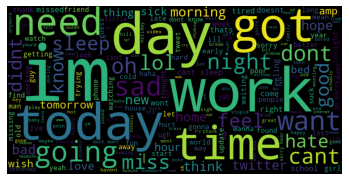

In [210]:
wc = WordCloud(width=800,height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [211]:
# Spelling Correction #

In [212]:
from textblob import TextBlob

In [216]:
x = "tanks forr waching this vidio"

In [217]:
x = TextBlob(x).correct()

In [218]:
x

TextBlob("tanks for watching this video")

In [219]:
#### Tokenization ###

In [220]:
x = "thanks for watching this vedio. please like it"

In [222]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [223]:
TextBlob(x).words

WordList(['thanks', 'for', 'watching', 'this', 'vedio', 'please', 'like', 'it'])

In [224]:
doc = nlp(x)
for token in doc:
  print(token)

thanks
for
watching
this
vedio
.
please
like
it


In [225]:
#### Lematization ####

In [226]:
x

'thanks for watching this vedio. please like it'

In [227]:
x = "runs run running ran"

In [228]:
x

'runs run running ran'

In [232]:
nltk.download('wordnet')
from textblob import Word

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [233]:
for token in x.split():
  print(Word(token).lemmatize())

run
run
running
ran


In [234]:
doc = nlp(x)
for token in doc:
  print(token.lemma_)

run
run
run
run


In [235]:
#### Detect Entities using NER of Spacy

In [236]:
x = "Breaking News: Donalad Trump, the president of the USA is looking to sign a deal to mine the moon"

In [238]:
doc = nlp(x)
for ent in doc.ents:
  print(ent.text+' - '+ ent.label_+ '  - '+ str(spacy.explain(ent.label_)))

USA - GPE  - Countries, cities, states


In [239]:
from spacy import displacy

In [240]:
displacy.render(doc,style= 'ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">Breaking News: Donalad Trump, the president of the \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    USA\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n is looking to sign a deal to mine the moon</div>'

In [241]:
### Detecting Nouns

In [242]:
x

'Breaking News: Donalad Trump, the president of the USA is looking to sign a deal to mine the moon'

In [243]:
for noun in doc.noun_chunks:
  print(noun)

Breaking News
Donalad Trump
the president
the USA
a deal
the moon


In [244]:
### Translation 

In [245]:
# Language code : https://www.loc.gov/standards/iso639-2/php/code_list.php

In [246]:
tb = TextBlob(x)

In [247]:
tb.detect_language()

'en'

In [249]:
tb.translate(to='hi')

TextBlob("ब्रेकिंग न्यूज़: संयुक्त राज्य अमेरिका के राष्ट्रपति डोनाल्ड ट्रम्प चाँद को खदान करने के लिए एक समझौते पर हस्ताक्षर करना चाहते हैं")

In [250]:
#### use inbuilt sentiment classifier

In [251]:
from textblob.sentiments import NaiveBayesAnalyzer

In [252]:
x ="we all stands together to figt with corona virus. we will win together"

In [258]:
tb = TextBlob(x,analyzer=NaiveBayesAnalyzer())

In [256]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [259]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8135469279512376, p_neg=0.18645307204876352)

In [260]:
#### Bag of words

In [261]:
####Word Embeddings

In [265]:
nlp  = spacy.load('en_core_web_1g')

OSError: ignored

In [ ]:
doc = n